In [ ]:
import pickle
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
# " LOAD DATA BASE"
dataset = 'KnowledgeBase.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,Intent,Utterance
0,saludos,Hooooooola!!
1,saludos,#$% holi!!
2,saludos,"alo, hi"
3,saludos,"aloha, buenos días!!"
4,saludos,AMIGA!!!!
5,saludos,amiiigaaa
6,saludos,baby!!
7,saludos,bebe
8,saludos,BelleZa
9,saludos,Bom Dia


In [46]:
knowledge_base["Intent"].unique()

array(['saludos', 'cancelar', 'preguntar', 'None'], dtype=object)

In [48]:
len(knowledge_base)

423

In [49]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["Intent"])  # numerical labels
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [50]:
intent_names = encoder.classes_
intent_names

array(['None', 'cancelar', 'preguntar', 'saludos'], dtype=object)

In [51]:
x = knowledge_base["Utterance"]
x

0                                 Hooooooola!!
1                                   #$% holi!!
2                                      alo, hi
3                         aloha, buenos días!!
4                                    AMIGA!!!!
                        ...                   
418       sofy como retiro mis aportes de sva 
419          gracias sofy, tengo otra pregunta
420                        sofy, otra pregunta
421                     sofy, otra pregunta...
422    en que información me puedes colaborar?
Name: Utterance, Length: 423, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [52]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<317x331 sparse matrix of type '<class 'numpy.float64'>'
	with 939 stored elements in Compressed Sparse Row format>

In [53]:
tfidf_vect.get_feature_names_out()

array(['abrir', 'acerca', 'acertada', 'aclarar', 'acudo', 'adios', 'ah',
       'aja', 'algo', 'alo', 'aloha', 'amable', 'amaneces', 'amiga',
       'amo', 'amor', 'antes', 'aportes', 'aprendido', 'archivo',
       'archivos', 'asesorar', 'asesorarme', 'asesores', 'asesoria',
       'asesoría', 'así', 'ayudame', 'ayudar', 'ayudas', 'ayudaste',
       'ayúdame', 'años', 'baby', 'bailar', 'bebé', 'belleza', 'bem',
       'bien', 'bom', 'bonita', 'buen', 'buena', 'buenas', 'bueno',
       'buenos', 'by', 'bye', 'byte', 'cae', 'cancela', 'cancelar',
       'capacidad', 'capito', 'casa', 'celular', 'chai', 'chaito', 'chao',
       'chaolin', 'chatbot', 'chau', 'cielo', 'comer', 'como',
       'compartir', 'con', 'confiable', 'consulta', 'consultar',
       'contenta', 'contestas', 'contigo', 'contingencia', 'control',
       'conversación', 'cosita', 'creó', 'cual', 'cucha', 'cuenta',
       'cuál', 'cuándo', 'cuánto', 'cuántos', 'cómo', 'dale', 'de',
       'debo', 'deje', 'dejo', 'desde',

In [54]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 10
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [55]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.331149,0.013076
1,0.100,0.425403,0.061892
2,0.100,0.425403,0.061892
3,10.000,0.855242,0.054048
4,100.000,0.852117,0.067077
5,1000.000,0.845665,0.058594


In [56]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

10

In [57]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

In [59]:
X_test.head()

158                          ok bye sofy
21                            ello sofi.
419    gracias sofy, tengo otra pregunta
10                                bonita
96                    sofy como  va todo
Name: Utterance, dtype: object

In [ ]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [58]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<106x331 sparse matrix of type '<class 'numpy.float64'>'
	with 236 stored elements in Compressed Sparse Row format>

In [60]:
y_pred = best_lr_model.predict(x_test_tfidf)

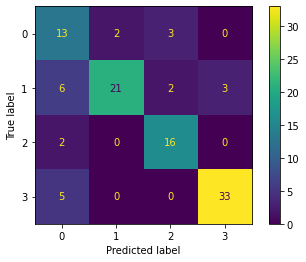

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.72      0.59        18
           1       0.91      0.66      0.76        32
           2       0.76      0.89      0.82        18
           3       0.92      0.87      0.89        38

    accuracy                           0.78       106
   macro avg       0.77      0.78      0.77       106
weighted avg       0.82      0.78      0.79       106



In [63]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

In [64]:
pdn_lr_model

LogisticRegression(C=10)

In [67]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('nlp_model.pkl', 'wb'))
pickle.dump(tfidf_vect, open('knowledgebase_vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('intent_names.pkl', 'wb'))